In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

In [2]:
df = pd.read_csv('Different_stores_dataset.csv')
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park


### 1. Check missing values and duplicate records

### 2. Add column name 'Total Sales'

In [3]:
df['Total Sales'] = df['quantity'] * df['selling_price_per_unit']
df.head()


,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,300.08
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,15004.25
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,242.40


### 3. How many customers have age more than 60?

In [4]:
customers_over_60 = df[df['age'] > 60]

num_customers_over_60 = customers_over_60.shape[0]

print(f"Number of customers with age greater than 60: {num_customers_over_60}")

Number of customers with age greater than 60: 17169


### 4. How many unique customer_id entries are there? Do any customers make multiple purchases?

In [5]:
unique_customers = df['customer_id'].nunique()

customer_purchase_counts = df['customer_id'].value_counts()

multiple_purchases = customer_purchase_counts[customer_purchase_counts > 1]

print(f"Number of unique customers: {unique_customers}")
print(f"Number of customers who made multiple purchases: {len(multiple_purchases)}")


Number of unique customers: 99457
Number of customers who made multiple purchases: 0


### 5. Are there more male or female customers, Show in Pie Chart?

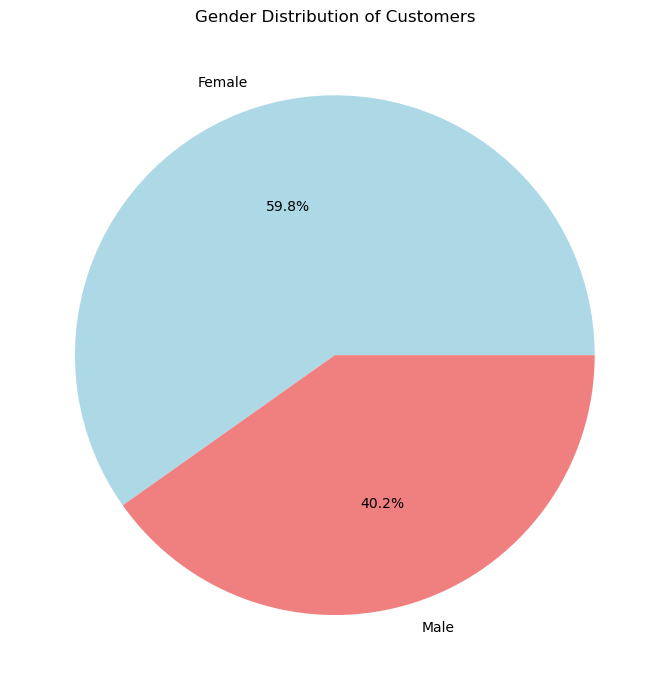

In [8]:
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], figsize=(7, 7))

plt.title('Gender Distribution of Customers')
plt.ylabel('')
plt.tight_layout()
plt.show()


### 6. Which category is least popular among customers?

In [9]:
category_popularity = df['category'].value_counts()

least_popular_category = category_popularity.idxmin()
least_popular_count = category_popularity.min()

print(f"The least popular category among customers is '{least_popular_category}' with {least_popular_count} transactions.")


The least popular category among customers is 'Books' with 4981 transactions.


### 7. Which category has the highest sales volume?

In [10]:
category_sales_volume = df.groupby('category')['quantity'].sum()

top_category = category_sales_volume.idxmax()
top_sales_volume = category_sales_volume.max()

print(f"The category with the highest sales volume is '{top_category}' with a total sales volume of {top_sales_volume}.")


The category with the highest sales volume is 'Clothing' with a total sales volume of 103598.


### 8. Add column name 'Total Profit'

Total Profit=Total Sales−Total Costs

In [11]:
df['Total Profit'] = (df['selling_price_per_unit'] - df['cost_price_per_unit']) * df['quantity']
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00,375.100
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53,540.153
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,300.08,5.020
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,15004.25,500.425
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,242.40,60.600


### 9. Display the top 10 invoices with the highest quantities sold?

In [12]:
top_5_quantities = df.sort_values(by='quantity', ascending=False).head(5)

print(top_5_quantities[['invoice_no', 'customer_id', 'quantity', 'selling_price_per_unit', 'Total Sales']])


    invoice_no customer_id  quantity  selling_price_per_unit  Total Sales
100    I283443     C189493        15                 3150.00     47250.00
275    I282789     C172185        12                   81.32       975.84
109    I293215     C166635        12                  162.64      1951.68
305    I115679     C266462        11                  300.08      3300.88
129    I160221     C319231        10                  900.24      9002.40


### 10. Which payment method is most commonly used?

In [13]:
payment_method_counts = df['payment_method'].value_counts()

most_common_payment_method = payment_method_counts.idxmax()
most_common_payment_count = payment_method_counts.max()

print(f"The most commonly used payment method is '{most_common_payment_method}' with {most_common_payment_count} occurrences.")


The most commonly used payment method is 'Cash' with 44447 occurrences.


### 11. Total Sales with respect to region?

In [14]:
region_sales = df.groupby('region')['Total Sales'].sum()

region_sales_sorted = region_sales.sort_values(ascending=False)

print("Total sales with respect to region:")
print(region_sales_sorted)


Total sales with respect to region:
region
West       79825624.03
East       72280660.57
Central    58803471.74
South      40655491.64
Name: Total Sales, dtype: float64


### 12. Sort Malls with average sales higher to lower?

In [15]:
mall_sales_avg = df.groupby('shopping_mall')['Total Sales'].mean()

mall_sales_avg_sorted = mall_sales_avg.sort_values(ascending=False)

print("Average sales with respect to shopping malls:")
print(mall_sales_avg_sorted)


Average sales with respect to shopping malls:
shopping_mall
Zorlu Center        2573.248351
Kanyon              2550.618396
Mall of Istanbul    2543.276766
Viaport Outlet      2523.835118
Istinye Park        2523.186677
Metropol AVM        2497.777108
Metrocity           2485.030133
Name: Total Sales, dtype: float64


### 13. Sort categories with the highest profit margins display in bar plot?

Profit Margin=(Total Sales/Total Profit)×100

In [18]:
category_profit = df.groupby('category')['Total Profit'].sum()
category_sales = df.groupby('category')['Total Sales'].sum()
    
category_profit_margin = (category_profit / category_sales) * 100
    
category_profit_margin_sorted = category_profit_margin.sort_values(ascending=False)

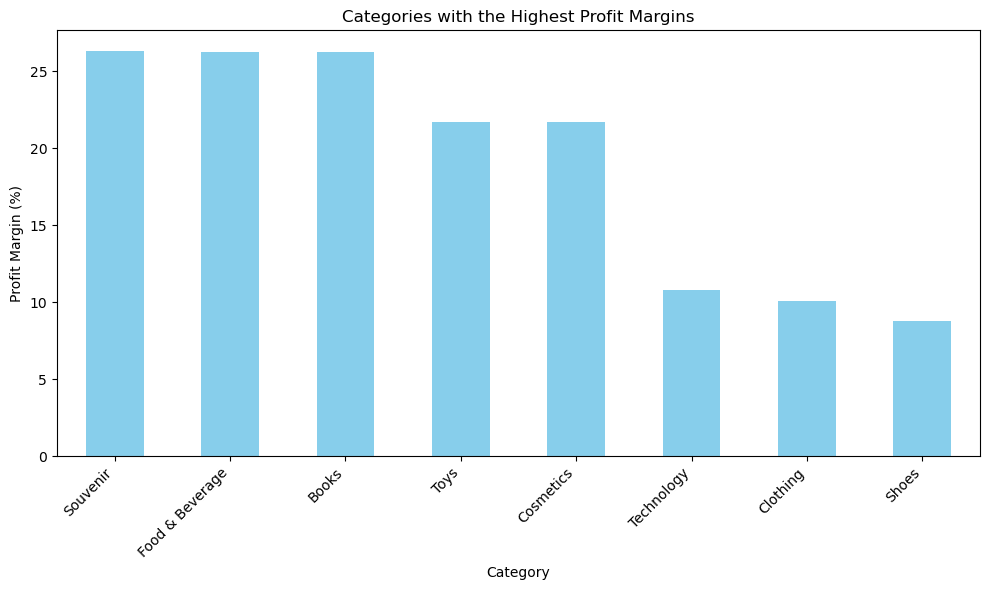

In [19]:
plt.figure(figsize=(10, 6))
category_profit_margin_sorted.plot(kind='bar', color='skyblue')
plt.title('Categories with the Highest Profit Margins')
plt.xlabel('Category')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 14.  What is the total number of transactions per region for each payment method?

In [33]:
payment_method_by_region = df.pivot_table(index='region', columns='payment_method', aggfunc='size', fill_value=0)

print(payment_method_by_region)


payment_method   Cash  Credit Card  Debit Card
region                                        
Central         10319         8140        4640
East            12738         9817        5751
South            7227         5698        3284
West            14163        11276        6404


### 15. How do sales in different categories compare between males and females?

In [25]:
category_sales_gender_pivot = df.pivot_table(index='category', columns='gender', values='Total Sales', aggfunc='sum')
print(category_sales_gender_pivot)


gender                Female         Male
category                                 
Books              489420.75    345238.20
Clothing         68260097.84  45754397.92
Cosmetics         4068073.66   2728611.28
Food & Beverage    505322.60    344233.37
Shoes            39425167.30  27128284.17
Souvenir           382867.20    252957.45
Technology       34669950.00  23230200.00
Toys              2416046.08   1564380.16
